<a href="https://colab.research.google.com/github/AmiMunshi/Image_Processing/blob/master/HistogramEqualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
np.min(pollen2) #Find min intensity value

91

In [ ]:
np.max(pollen2) #Find max intensity value

138

In [ ]:
#Histogram Equalization
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
imgOri= cv2.imread('Pollen2.tif', 0) # Read the image

In [ ]:
m,n= imgOri.shape # Find the number of rows and columns

In [ ]:
#Counting the number of pixels for each intensity value
nk= []
rk=[]
for r in range(256):
  count= 0
  rk.append(r)
  for i in range(m):
    for j in range(n):
      
      if imgOri[i,j]==r:
        count+=1
  nk.append(count)

In [ ]:

nk= np.array(nk) #Convert nk list to np array
pdf= nk/m*n # Find probability of each pixel
pdf1= pdf.copy()
cdf= np.array(np.zeros(len(pdf)))
cdf[0]= pdf[0]
#Obtain CDF
for i in range(1,len(pdf)):
  cdf[i]= cdf[i-1]+pdf1[i]
  
sk= cdf*255
sk= sk.astype(int) #Rounding sk



In [ ]:
imgEqu= np.zeros((m,n),dtype=int) #Create a matrix for equalized image
#Replace the pixel value in the original image by the pixel value sk obtained after equalization
for i in range(m):
  for j in range(n):
    temp= imgOri[i,j]
    imgEqu[i,j]= sk[temp]




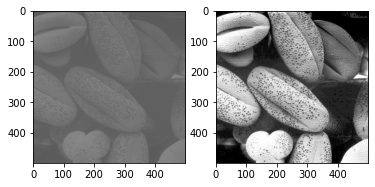

In [ ]:
#Plot original and equalized image
plt.subplot(1,2,1)
plt.imshow(imgOri, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.imshow(imgEqu, cmap='gray')

In [ ]:
cv2.imwrite("PollenEq.png", imgEqu) #Save the image

True

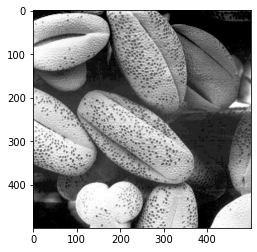

In [ ]:
imgnew= np.zeros((m,n),dtype=int)
imgnew= sk[imgOri]

plt.imshow(imgnew, cmap='gray')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

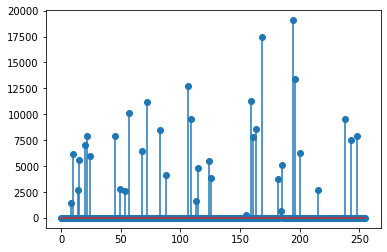

In [ ]:
histequ = cv2.calcHist([imgEqu],[0],None,[256],[0,256]) #Using in built function
plt.stem(histequ)

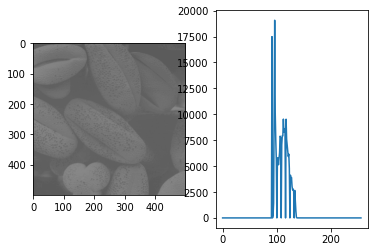

In [ ]:
#Using in built calchist function to plot the histograms
pollen2= cv2.imread('Pollen2.tif', 0)
hist1 = cv2.calcHist([pollen2],[0],None,[256],[0,256])
plt.subplot(1,2,1)
plt.imshow(pollen2,cmap='gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.plot(hist1)
